# Image Classification on the ASL Alphabet Dataset Utilizing Convolutional Neural Networks

## Author: Ehsan Gharib-Nezhad
#### [LinkedIn](https://www.linkedin.com/in/ehsan-gharib-nezhad/) 


The image data set is taken from [Kaggle](https://www.kaggle.com/grassknoted/asl-alphabet) and consists of 87,000 images in 29 folders which represent 26 American sign language classes (e.g., A, B, ..., Z) and 3 classes for SPACE, DELETE and NOTHING.

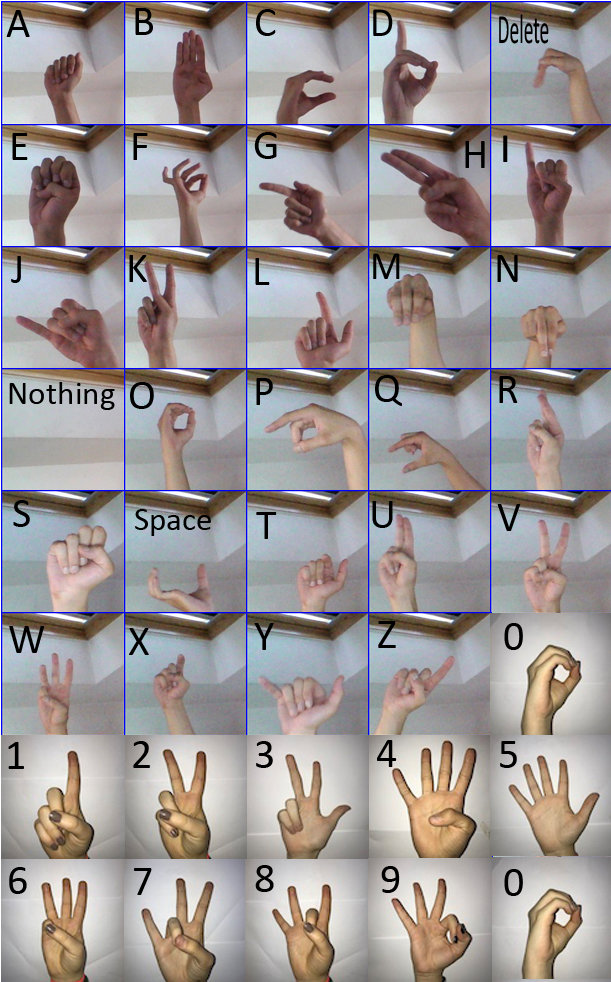

## Import libraries

In [180]:
import pandas as pd
import numpy as np
# import cStringIO
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image
from os import listdir
from os.path import isfile, join
import skimage
from skimage.transform import resize
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import random
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils


## Image Processing
1. load the images
2. convert them to Numpy Arrays
3. resize them 

In [2]:
def read_npArray_resize_image(image_path, x_pixel, y_pixel):
    """
    This function read '.jpg' image using  Python Pillow library (PIL)
    then resize the image using 
    INPUTS: 
    - image_path: 
        full path of the image including the image name
        e.g., '../team-ASL-github-testing-dataset/asl_alphabet_train/asl_alphabet_train/A/A2292.jpg'
    - x_pixel and y_pixel: 
        to resize the image if the original size looks unnecessarily
        e.g., 60x60 if we want to resize them from 200x200
    """
    return skimage.transform.resize(np.asarray(Image.open(image_path)), (x_pixel, y_pixel, 1))

In [3]:
# read_npArray_resize_image(image_path_list_1D[0],60,60)

In [10]:
# read all images in all directores
x_pixel = 60
y_pixel = 60
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
            'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
            'del', 'nothing', 'space']


# Specify Path for the Training set  _______________________________________________________
mypath = '../../../../ga/dsif-ga/projects/team-ASL-github-testing-dataset/asl_alphabet_train/asl_alphabet_train/'

# Read all image paths and convert it to 1D array __________________________________________
image_path_list_2D=[ [mypath+letter+'/'+f for f in listdir(mypath+letter+'/') 
                      if isfile(join(mypath+letter+'/', f))] for letter in alphabet]
image_path_list_1D = np.reshape(image_path_list_2D,29*3000)


# Select a percentage of the whole data randomly ___________________________________________
total_image_numbers = len(image_path_list_1D)
random_numbers = random.sample(range(total_image_numbers), int(total_image_numbers*.5) )
image_path_list_1D_randomized = image_path_list_1D[[random_numbers[:]]]
target_from_image_path_list_1D_randomized = [path_image.split(os.sep)[-2] 
                                             for path_image in image_path_list_1D_randomized ]


# Read Image, Convet to Numpy, Resize them using read_npArray_resize_image _________________
image_npArray_resized = [read_npArray_resize_image(image_path, x_pixel, y_pixel) 
                         for image_path in image_path_list_1D_randomized ] 

# img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))

<ipython-input-10-f439509f4c54>:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  image_path_list_1D_randomized = image_path_list_1D[[random_numbers[:]]]


## Define the targets and associate number to them

In [11]:
alphabet_target = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10, 'L':11, 'M':12, \
            'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, \
            'Z':25, 'del':26, 'nothing':27, 'space':28}


In [12]:
# Create target for the randomized images
y = pd.DataFrame(target_from_image_path_list_1D_randomized)[0].map(alphabet_target)

# Prepare Target `y` Dataset Distribution 

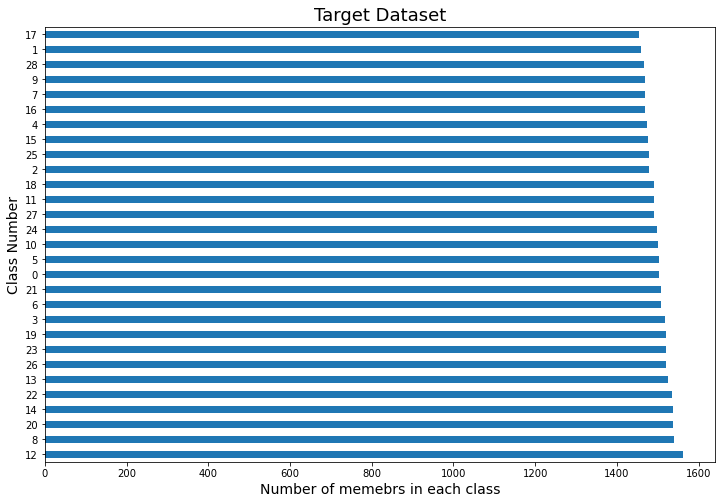

In [13]:
plt.figure(figsize = (12,8))
y.value_counts().plot(kind='barh')
plt.title('Target Dataset', fontsize =18)
plt.xlabel('Number of memebrs in each class', fontsize =14)
plt.ylabel('Class Number', fontsize =14 );

In [14]:
print ( 'The shape of the resized randomly-selected numpy array of images are:',
       np.shape(image_npArray_resized))

The shape of the resized randomly-selected numpy array of images are: (43500, 60, 60, 1)


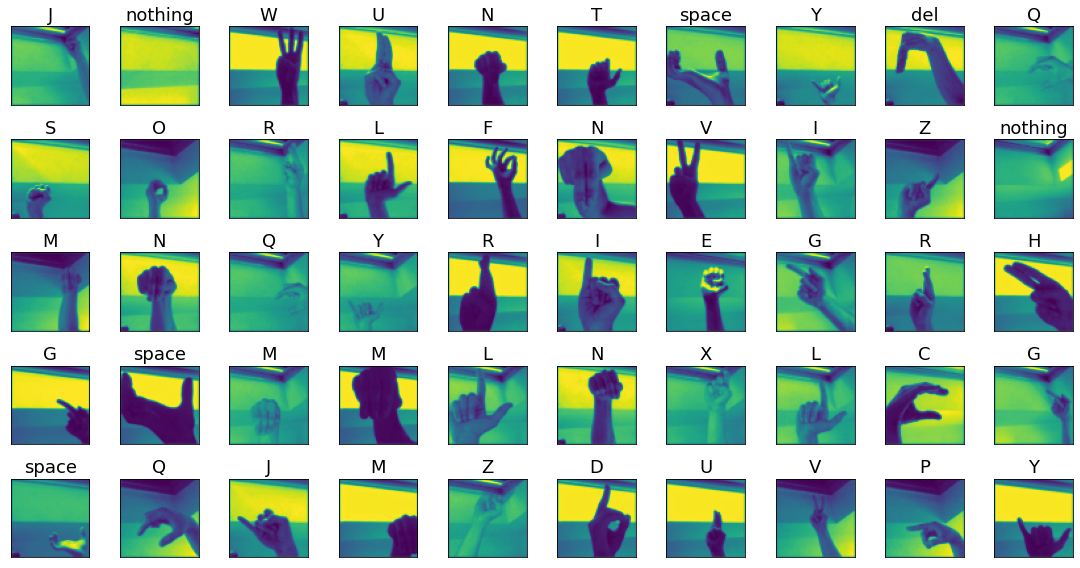

In [49]:
import numpy as np
import matplotlib.pyplot as plt

key_list = list(alphabet_target.keys())
val_list = list(alphabet_target.values())



fig = plt.figure(figsize=(16, 8))

columns = 10
rows = 5
for i in range(1, columns*rows +1):
#         plt.title('Example of Processed/Resized ASL Alphabet Images\n', fontsize = 20 )
    img = image_npArray_resized[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(str(key_list[val_list.index(y[i])]) , fontsize = 18 )
    plt.xticks([])
    plt.yticks([])
# plt.show()
plt.subplots_adjust(left=0.01, bottom=0.5, right=0.99, top=0.9, wspace=0.3, hspace=.3)
plt.tight_layout()


---

# Prepare Input `X` subset 

In [50]:
X = image_npArray_resized

In [51]:
print ('The original shape of the input X dataset is: ', np.shape(X))

The original shape of the input X dataset is:  (43500, 60, 60, 1)


In [52]:
# reshape the X dataset from 4D to 3D by the following line:

X = np.array(X).reshape(len(y),x_pixel, y_pixel)

In [53]:
print ('The shape of the resized input X dataset is: ', np.shape(X))

The shape of the resized input X dataset is:  (43500, 60, 60)


# Split Train Test from X and y datasets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   stratify=y) 

In [55]:
# Make sure each value is a float. (Otherwise, we get an error.)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [56]:
print(f'The shape of X_train, X_test subsets are: {np.shape(X_train)} , {np.shape(X_test)}')
print(f'The shape of X_train, X_test subsets are: {np.shape(y_train)} , {np.shape(y_test)}')


The shape of X_train, X_test subsets are: (32625, 60, 60) , (10875, 60, 60)
The shape of X_train, X_test subsets are: (32625,) , (10875,)


In [57]:
# Reshape each image to be x_pixel x y_pixel x 1.
# The 1 corresponds to the one black/white value.
# If we had a color image, we would likely use 3 for RGB.

X_train = X_train.reshape(X_train.shape[0], x_pixel, y_pixel, 1)
X_test = X_test.reshape(X_test.shape[0], x_pixel, y_pixel, 1)

## Converts a class vector (integers) to binary class matrix.

In [65]:
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)


In [63]:
# y_train_cat

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# Build a Simple  Feed-Forward Neural Networks

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


## Check shapes

In [146]:
print(f'The shape of X_train, X_test subsets are: {np.shape(X_train)} , {np.shape(X_test)}')
print(f'The shape of X_train, X_test subsets are: {np.shape(y_train_cat)} , {np.shape(y_test_cat)}')

The shape of X_train, X_test subsets are: (32625, 60, 60, 1) , (10875, 60, 60, 1)
The shape of X_train, X_test subsets are: (32625, 29) , (10875, 29)


In [147]:
fnns = Sequential()

fnns.add(Flatten(input_shape = (x_pixel, y_pixel, 1))) # INPUT LAYER

fnns.add(Dense(128*3, activation = 'relu'))
fnns.add(Dense(64*2, activation = 'relu'))
fnns.add(Dense(29, activation = 'softmax'))

fnns.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit model on training data.
history = fnns.fit(X_train, y_train_cat, validation_data = (X_test, y_test_cat),
                   batch_size = 1024, 
                   epochs = 500,
                   verbose = 0) 

In [149]:
score_test = fnns.evaluate(X_test,y_test_cat, verbose=0)
print('Test set Score [Loss, Accuracy]=',score_test)
score_train = fnns.evaluate(X_train,y_train_cat, verbose=0)
print('Train Set Score [Loss, Accuracy]=',score_train)

Test set Score [Loss, Accuracy]= [0.23806113004684448, 0.9345287084579468]
Train Set Score [Loss, Accuracy]= [0.1597866266965866, 0.9640460014343262]


# Plot Feedforward Neural Networks Scores

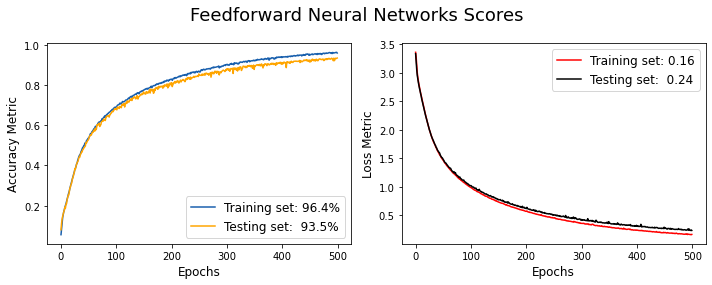

In [156]:
# Check out our train loss and test loss over epochs.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
plt.suptitle('Feedforward Neural Networks Scores', fontsize = 18)

# color = 'tab:red'
axes[0].set_xlabel('Epochs',  fontsize = 12)
axes[0].set_ylabel('Accuracy Metric', fontsize = 12)
axes[0].plot(accuracy ,  label='Training set: '+str(np.round(score_train[1]*100,1))+'%', color='#185fad')
axes[0].plot(val_accuracy , label='Testing set:  '+str(np.round(score_test[1]*100,1))+'%', color='orange')


axes[1].set_xlabel('Epochs', fontsize = 12)
axes[1].set_ylabel('Loss Metric', fontsize = 12)
axes[1].plot(loss , label='Training set: '+str(np.round(score_train[0],2)), color='red')
axes[1].plot(val_loss ,  label='Testing set:  '+str(np.round(score_test[0],2)), color='black')


axes[0].legend(fontsize = 12)
axes[1].legend(fontsize = 12)
fig.tight_layout()
plt.show()

In [157]:
# Check out the model summary.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 384)               1382784   
_________________________________________________________________
dense_10 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_11 (Dense)             (None, 29)                3741      
Total params: 1,435,805
Trainable params: 1,435,805
Non-trainable params: 0
_________________________________________________________________


# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Convolutional Neural Networks

Actetacture Details:
- 2 Hidden Layers (128, 64)
- 1 Conv2D with 6 filters and 3x3 kernel size
- MaxPooling2D
- 

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [158]:
cnns = Sequential()

# Add a convolutional layer.

cnns.add(Conv2D(filters = 6,       #number of filters to use
              kernel_size = (3, 3),   #dimensions of the filters
              activation = 'relu',    #activation function
              input_shape = (x_pixel, y_pixel, 1)))  #shape of image



cnns.add(Flatten(input_shape = (x_pixel, y_pixel, 1))) # INPUT LAYER

cnns.add(Dense(128*3, activation = 'relu'))
cnns.add(Dense(64*2, activation = 'relu'))
cnns.add(Dense(29, activation = 'softmax'))

cnns.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fit model on training data.
history = cnns.fit(X_train, y_train_cat, validation_data = (X_test, y_test_cat),
                   batch_size = 1024,
                   epochs = 500,
                   verbose = 0) 

In [160]:
score_test = cnns.evaluate(X_test,y_test_cat, verbose=0)
print('Test set Score [Loss, Accuracy]=',score_test)
score_train = cnns.evaluate(X_train,y_train_cat, verbose=0)
print('Train Set Score [Loss, Accuracy]=',score_train)

Test set Score [Loss, Accuracy]= [0.09118909388780594, 0.977011501789093]
Train Set Score [Loss, Accuracy]= [0.018231863155961037, 0.9978237748146057]


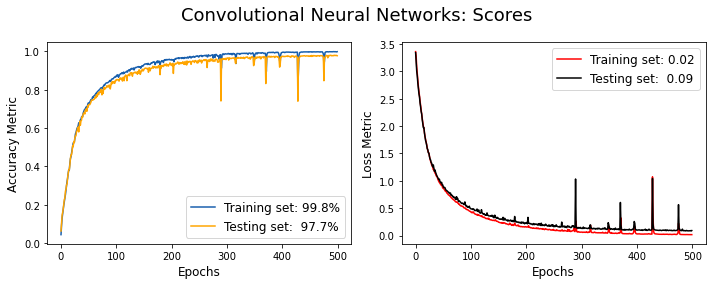

In [162]:
# Check out our train loss and test loss over epochs.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
plt.suptitle('Convolutional Neural Networks: Scores', fontsize = 18)

# color = 'tab:red'
axes[0].set_xlabel('Epochs',  fontsize = 12)
axes[0].set_ylabel('Accuracy Metric', fontsize = 12)
axes[0].plot(accuracy ,  label='Training set: '+str(np.round(score_train[1]*100,1))+'%', color='#185fad')
axes[0].plot(val_accuracy , label='Testing set:  '+str(np.round(score_test[1]*100,1))+'%', color='orange')


axes[1].set_xlabel('Epochs', fontsize = 12)
axes[1].set_ylabel('Loss Metric', fontsize = 12)
axes[1].plot(loss , label='Training set: '+str(np.round(score_train[0],2)), color='red')
axes[1].plot(val_loss ,  label='Testing set:  '+str(np.round(score_test[0],2)), color='black')


axes[0].legend(fontsize = 12)
axes[1].legend(fontsize = 12)
fig.tight_layout()
plt.show()



# Save model

In [168]:
#  serialize model to JSON
model_json = cnns.to_json()
with open("../outputs/cnns_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
cnns.save_weights("../outputs/cnns_model.h5")

# Load Model

In [170]:
from keras.models import model_from_json
# later...
 
# load json and create model
json_file = open('../outputs/cnns_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../outputs/cnns_model.h5")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test_cat, verbose=0)
print("Test set:  %s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
score = loaded_model.evaluate(X_train, y_train_cat, verbose=0)
print("Train set:  %s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Test set:  accuracy: 97.70%
Train set:  accuracy: 99.78%


In [171]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 6)         60        
_________________________________________________________________
flatten_4 (Flatten)          (None, 20184)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 384)               7751040   
_________________________________________________________________
dense_13 (Dense)             (None, 128)               49280     
_________________________________________________________________
dense_14 (Dense)             (None, 29)                3741      
Total params: 7,804,121
Trainable params: 7,804,121
Non-trainable params: 0
_________________________________________________________________


# Confusion Matrix

In [184]:
# plot confusion matrix and model metrics summary ==============
import itertools

def plot_confusion_matrix_multiTargets(cm,
                                       class_y
                                       ):
                
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     cmap=plt.cm.Blues
    
    # import libraries =========================================

#     cm = confusion_matrix(y_test,y_pred, normalize='true')
    plt.figure(figsize=(19,19))

    plt.imshow(cm, interpolation='nearest', cmap='coolwarm')

    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12) 
#     tick_marks = np.arange(len(class_y))
#     plt.xticks(tick_marks, fontsize = 12)
#     plt.yticks(tick_marks, fontsize = 12)
    cm = cm
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, (cm[i, j]),
                 horizontalalignment="center",
                 color="white" if i!=j  else "black",
                 weight='normal' if i==j else 'normal',
                fontsize = 12)

    plt.ylabel('True Value', fontsize = 18)
    plt.xlabel('Predicted Value', fontsize = 18)
    plt.tight_layout()   


    plt.ylabel('True Value', fontsize = 18)
    plt.xlabel('Predicted Value', fontsize = 18)
    plt.title('Convolutional Neural Networks: Confusion Matrix Scores', fontsize = 18)
    plt.xticks(list(alphabet_target.values()), list(alphabet_target.keys()), fontsize = 14)
    plt.yticks(list(alphabet_target.values()), list(alphabet_target.keys()), fontsize = 14)



In [178]:
y_pred = loaded_model.predict(X_test)
cfr = classification_report( np.argmax(y_pred, axis=1) , 
                                                      np.array(y_test.values), 
                                                      target_names=alphabet_target.keys()
                                                      ) 
print(cfr)

              precision    recall  f1-score   support

           A       0.97      0.98      0.97       371
           B       0.95      0.97      0.96       359
           C       0.99      0.99      0.99       371
           D       0.98      1.00      0.99       372
           E       0.96      0.95      0.96       371
           F       0.99      0.97      0.98       383
           G       0.99      0.98      0.99       381
           H       0.98      0.99      0.98       360
           I       0.99      0.97      0.98       392
           J       1.00      0.98      0.99       375
           K       0.99      0.98      0.99       376
           L       0.98      0.99      0.99       371
           M       0.98      0.98      0.98       390
           N       0.99      1.00      0.99       376
           O       0.98      0.97      0.98       391
           P       0.98      0.98      0.98       369
           Q       0.99      0.98      0.98       371
           R       0.93    

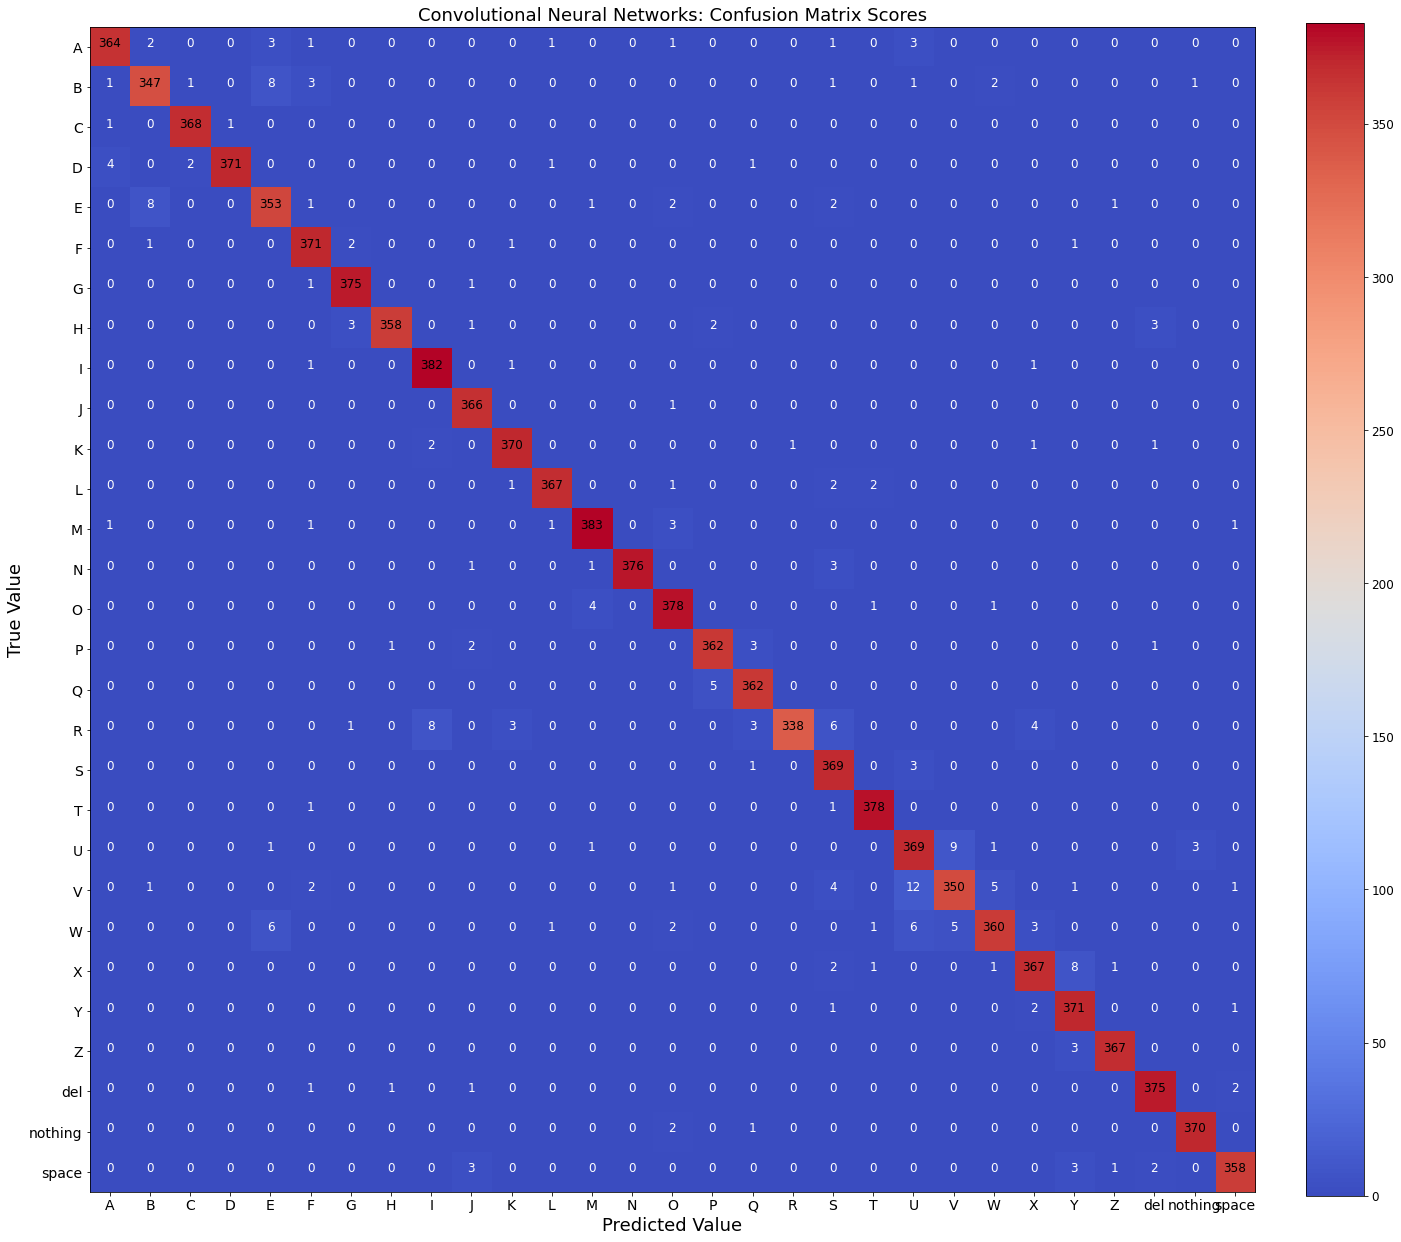

In [185]:
y_pred = loaded_model.predict(X_test)

Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test_cat,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# print ( np.argmax(y_pred, axis=1),np.shape(np.argmax(y_pred, axis=1)) )

plot_confusion_matrix_multiTargets(  confusion_mtx,
                                   Y_pred_classes
                                       )

---